In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('predict data(ARIMA).csv')

In [ ]:
# 기본 정보를 출력.
print(df.shape)
print(df.info())

(241, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    241 non-null    object 
 1   price   241 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB
None


In [ ]:
df.head()

,date,price
0,2001-07-01 0:00,65.992
1,2001-08-01 0:00,66.245
2,2001-09-01 0:00,66.182
3,2001-10-01 0:00,66.182
4,2001-11-01 0:00,65.804


In [ ]:
# to_datetime으로 day 피처를 시계열 피처로 변환합니다.
df['date'] = pd.to_datetime(df['date'])

# day 데이터프레임의 index로 설정합니다.
df.index = df['date']
df.set_index('date', inplace=True)
df.head()

,price
date,
2001-07-01,65.992
2001-08-01,66.245
2001-09-01,66.182
2001-10-01,66.182
2001-11-01,65.804


In [ ]:
df.describe()

,price
count,241.000000
mean,86.561207
std,11.117978
min,65.804000
25%,76.125000
50%,90.102000
75%,95.640000
max,102.260000


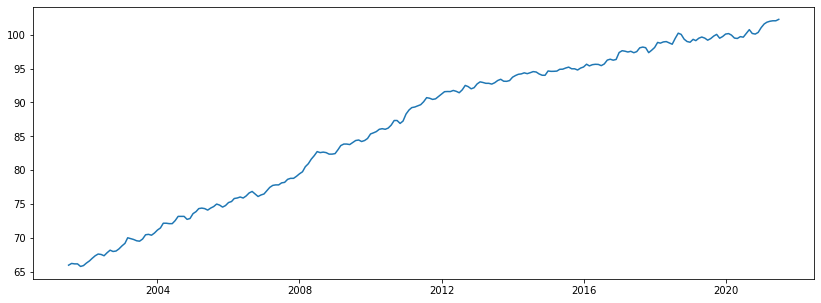

In [ ]:
# 월별 물가를 시각화합니다.
plt.figure(figsize=(14,5))
plt.plot(df.index, df.values)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  240
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -28.969
Method:                       css-mle   S.D. of innovations              0.273
Date:                Sun, 11 Sep 2022   AIC                             69.937
Time:                        04:23:49   BIC                             90.821
Sample:                             1   HQIC                            78.352
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1517      0.015      9.837      0.000       0.121       0.182
ar.L1.D.y      0.6741      0.137      4.903      0.000       0.405       0.944
ar.L2.D.y     -0.5772      0.108     -5.344      0.0

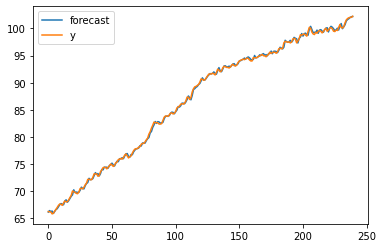

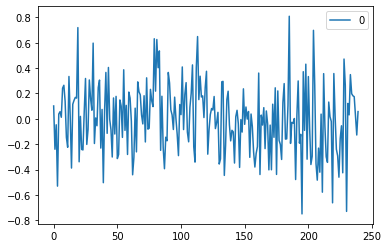

In [ ]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화합니다. (두번째 그래프)
residuals.plot()

In [ ]:
forecast_data = model_fit.forecast(steps=13) # 학습 데이터셋으로부터 13개월 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
test_df = pd.read_csv('test data.csv', names=['ds', 'y'])

pred_y = forecast_data[0].tolist() # 마지막 13개월의 예측 데이터입니다.2021-08-01 ~ 2022-08-01)
test_y = test_df.y.values # 실제 13개월 물가 데이터입니다.(2021-08-01 ~ 2022-08-01)
pred_y_lower = [] # 마지막 13개월의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 13개월의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

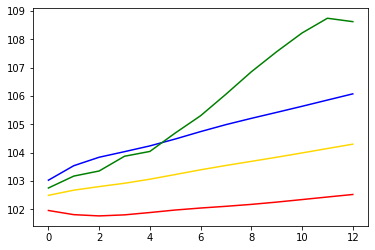

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

2.7204620928724577


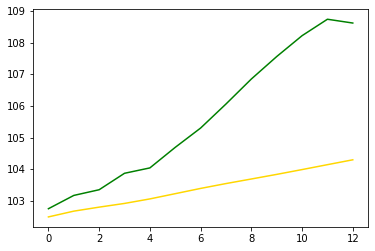

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.